# Gene_presence_absence

This notebook loads the finalized *L. starkeyi* NRRL Y-11557 genome scale model and determines how many genes and reactions are accounted for using orthoMCL group files. 

import needed libraries. 

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import cobra

the following three letter codes were used as shorthand code to represent each species in the orthoMCL pipeline.

note. 'aah' and 'aau' represent duplicate datafiles for the Ldo8726_1 proteins. 

code **aaz** refers to *Lipomyces starkeyi* NRRL-11557 that was used to construct the GSM. 

In [2]:
# Create a dictionary from the provided mapping
code_to_phrase = {
    'aaa': 'Lst7851_1_FilteredModels1_proteins_2023-09-10.fasta',
    'aab': 'Lipotetr1_FilteredModels1_proteins_2023-09-10.fasta',
    'aac': 'Lipchi1_FilteredModels1_proteins_2023-09-10.fasta',
    'aad': 'Liptetr1_GeneModels_FilteredModels1_aa.fasta',
    'aae': 'Liptetra1_GeneModels_FilteredModels1_aa.fasta',
    'aaf': 'Liparx1_FilteredModels1_proteins_2023-09-10.fasta',
    'aag': 'Lst7536_1_FilteredModels1_proteins_2023-09-10.fasta',
    'aah': '17655849-Ldo8726_1_FilteredModels1_proteins_2023-09-09.fasta',
    'aai': 'Lipokono1_FilteredModels1_proteins_2023-09-10.fasta',
    'aaj': 'Lst8064_1_FilteredModels1_proteins_2023-09-10.fasta',
    'aak': 'Lipoli1_FilteredModels1_proteins_2023-09-09.fasta',
    'aal': 'Diptot1_FilteredModels1_proteins_2023-09-09.fasta',
    'aam': 'Lipstar1_1_GeneModels_FilteredModels1_aa.fasta',
    'aan': 'Lipodoor1_FilteredModels1_proteins_2023-09-10.fasta',
    'aao': 'Lipstark1_1_GeneModels_FilteredModels1_aa.fasta',
    'aap': 'Liptet1_GeneModels_FilteredModels1_aa.fasta',
    'aaq': 'Lipsmi1_GeneModels_FilteredModels1_aa.fasta',
    'aar': 'Lipjap1_FilteredModels1_proteins_2023-09-07.fasta',
    'aas': 'Lipsuo1_GeneModels_FilteredModels1_aa.fasta',
    'aat': 'Lipdoo1_GeneModels_FilteredModels1_aa.fasta',
    'aau': '17622865-Ldo8726_1_FilteredModels1_proteins_2023-09-09.fasta',
    'aav': 'Babin1_GeneCatalog_proteins_20120306.aa.fasta',
    'aaw': 'Lipori1_1_GeneModels_FilteredModels1_aa.fasta',
    'aax': 'Dipuni1_GeneModels_FilteredModels1_aa.fasta',
    'aay': 'Yarlip1_GeneCatalog_proteins_20160930.aa.fasta',
    'aaz': 'Lipst1_1_GeneCatalog_proteins_20110609.aa.fasta',
    'aba': 'Lipsta1_1_GeneModels_FilteredModels1_aa.fasta',
    'abb': 'Lipmes1_FilteredModels1_proteins_2023-09-10.fasta',
    'abc': 'Myxme1_GeneCatalog_proteins_20180510.aa.fasta',
    'abd': 'Lipkon1_GeneModels_FilteredModels1_aa.fasta'
}

# Modify the phrases by splitting at either "Gene" or "Filtered"
modified_phrases = {}
for code, phrase in code_to_phrase.items():
    split_points = [phrase.find('_Gene'), phrase.find('_Filtered')]
    split_point = min([sp for sp in split_points if sp != -1])
    modified_phrase = phrase[:split_point]
    modified_phrases[code] = modified_phrase


load the finalized GSM. 

In [3]:
lst = cobra.io.load_json_model('../models/Lst_v0_4_forPUB.json')

Set parameter TokenServer to value "leghorn.emsl.pnl.gov"


In [4]:
# cobra.io.write_sbml_model(lst,'Lst_v0_4_forPUB.xml')

In [8]:
# cobra.io.write_sbml_model(lst,'Lst_v0_4_forPUB.sbml')

In [9]:
# cell to read in orthoMCL group output file.
# cell determines how many species have AT LEAST one ortholog in a group that 
# also includes L. starkeyi NRRL Y-11558 (code 'aaz').

    
# orthoMCL group output file. 
file_path = 'pairs/groups.txt'

# Read the file.
with open(file_path, 'r') as f:
    lines = f.readlines()

# Split the data into groups. 
group_data = {}
for line in lines:
    group, *entries = line.strip().split()
    group_data[group] = entries

# Identify groups containing L. starkeyi 'aaz'.  
groups_with_aaz = {group: entries for group, entries in group_data.items() if any('aaz' in entry for entry in entries)}
groups_without_aaz = {group: entries for group, entries in group_data.items() if not any('aaz' in entry for entry in entries)}

# Save groups with L. starkeyi 'aaz' to a DataFrame.
# df_aaz = pd.DataFrame.from_dict(groups_with_aaz, orient='index').transpose()

# Analyze the groups.
percentage_with_aaz = len(groups_with_aaz) / (len(groups_with_aaz) + len(groups_without_aaz))
print(f"Percentage of groups with 'aaz': {percentage_with_aaz * 100:.2f}%")

# Count instances in each group.
counts_with_aaz = defaultdict(int)
counts_without_aaz = defaultdict(int)

for entries in groups_with_aaz.values():
    for entry in entries:
        code = entry.split('|')[0]
        counts_with_aaz[code] += 1

for entries in groups_without_aaz.values():
    for entry in entries:
        code = entry.split('|')[0]
        counts_without_aaz[code] += 1

print("Counts in groups with 'aaz':", dict(counts_with_aaz))
print("Counts in groups without 'aaz':", dict(counts_without_aaz))


Percentage of groups with 'aaz': 59.71%
Counts in groups with 'aaz': {'aaa': 6491, 'aab': 6320, 'aac': 5954, 'aad': 6419, 'aae': 6354, 'aaf': 5201, 'aag': 6628, 'aah': 6481, 'aai': 6309, 'aaj': 6327, 'aak': 5094, 'aal': 4794, 'aam': 6998, 'aan': 6330, 'aao': 7108, 'aap': 6450, 'aaq': 5223, 'aar': 5086, 'aas': 5241, 'aat': 6395, 'aau': 6481, 'aaw': 6334, 'aax': 5263, 'aaz': 7654, 'aba': 6544, 'abb': 5960, 'abc': 5218, 'abd': 6073, 'aay': 4240, 'aav': 4074}
Counts in groups without 'aaz': {'aaa': 588, 'aab': 1393, 'aac': 361, 'aad': 1148, 'aae': 1407, 'aag': 937, 'aah': 1309, 'aai': 870, 'aaj': 504, 'aam': 457, 'aan': 641, 'aao': 485, 'aap': 1367, 'aat': 908, 'aau': 1309, 'aaw': 837, 'aba': 922, 'abd': 669, 'abb': 405, 'aak': 377, 'aas': 631, 'aav': 620, 'aax': 382, 'aay': 899, 'abc': 717, 'aaf': 298, 'aaq': 433, 'aar': 414, 'aal': 288}


In [10]:
# Helper function to check if a gene id is in an entry.
def gene_in_entry(gene_id, entry):
    return entry.split('|')[-1] == str(gene_id)

# Mapping of genes to codes.
gene_to_codes = {}

# Get a flattened list of all unique codes from the groups_with_aaz dictionary.
all_codes = list({code.split('|')[0] for group in groups_with_aaz.values() for code in group})

for gene in lst.genes:
    gene_id = gene.id.split('1_1_')[1]

    # Find the groups where the current gene is associated with 'aaz'. 
    groups_for_gene = [group for group, entries in groups_with_aaz.items() if any(gene_in_entry(gene_id, entry) for entry in entries if 'aaz' in entry)]
    
    # Initialize all codes with 0 for the current gene.
    codes_for_gene = {code: 0 for code in all_codes}
    
    # If there are any such groups
    if groups_for_gene:
        for group in groups_for_gene:
            # Update the 'aaz' entry.
            codes_for_gene['aaz'] = 1
            
            # Check other codes in the same group
            for entry in groups_with_aaz[group]:
                code = entry.split('|')[0]
                # If the gene is associated with the current code in the same group, set it as 1.
                codes_for_gene[code] = 1
                    
    gene_to_codes[gene_id] = codes_for_gene

# Convert to a DataFrame
binary_matrix = pd.DataFrame.from_dict(gene_to_codes, orient='index').fillna(0).astype(int)



In [11]:
binary_matrix

,aap,aau,aah,aaw,aaf,aag,aak,aan,aaz,aab,...,aax,aao,aac,aai,aay,aam,aas,aad,aav,abb
6303,0,1,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
73838,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
46980,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5638,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
103302,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106947,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3870,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
164418,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
51333,1,0,0,1,1,1,1,1,1,1,...,1,0,1,0,1,0,1,1,1,1


In [12]:
# Initialize a dictionary to hold binary values for reactions.
reaction_binary_matrix = pd.DataFrame()
reaction_to_codes = {}

for reaction in lst.reactions:
    # Get the set of genes associated with this reaction.
    associated_genes = {gene.id.split('1_1_')[1] for gene in reaction.genes}

    # Initialize all codes with 0 for the current reaction.
    codes_for_reaction = {code: 0 for code in all_codes}
    
    # Check if all associated genes for this reaction have a '1' in the binary_matrix for each code.
    for code in all_codes:
        # We'll assume that if genes of a reaction are present for a given code, then the reaction is deemed present.
        if all(binary_matrix.at[gene, code] == 1 for gene in associated_genes):
            codes_for_reaction[code] = 1
    
    index_tuple = (reaction.id, reaction.name, reaction.subsystem)  # Multi-index tuple
    reaction_to_codes[index_tuple] = codes_for_reaction

# Convert to a DataFrame.
reaction_binary_matrix = pd.DataFrame.from_dict(reaction_to_codes, orient='index').fillna(0).astype(int)

# Rename the index levels.
# reaction_binary_matrix.index.rename(['Reaction ID', 'Reaction Name', 'Subsystem'], inplace=True)
reaction_binary_matrix.index.set_names('Reaction ID', level=0, inplace=True)
reaction_binary_matrix.index.set_names('Reaction Name', level=1, inplace=True)
reaction_binary_matrix.index.set_names('Subsystem', level=2, inplace=True)



In [13]:
reaction_binary_matrix.sum()

aap    2137
aau    2167
aah    2167
aaw    2157
aaf    2054
aag    2182
aak    2040
aan    2158
aaz    2193
aab    2139
aal    2024
aaa    2175
abd    2133
aaq    2057
abc    2081
aaj    2160
aar    2032
aae    2136
aba    2180
aat    2161
aax    2072
aao    2189
aac    2099
aai    2155
aay    1958
aam    2187
aas    2082
aad    2143
aav    1960
abb    2117
dtype: int64

In [14]:
# for reaction in lst.reactions:
#     # Get the set of genes associated with this reaction.
#     associated_genes = {gene.id.split('1_1_')[1] for gene in reaction.genes}

#     # Initialize all codes with 0 for the current reaction.
#     codes_for_reaction = {code: 0 for code in all_codes}
    
#     # Check if all associated genes for this reaction have a '1' in the binary_matrix for each code.
#     for code in all_codes:
#         # We'll assume that if all genes of a reaction are present for a given code, then the reaction is deemed present
#         if any(binary_matrix.at[gene, code] == 1 for gene in associated_genes):
            
#             codes_for_reaction[code] = 1
    

In [15]:
reaction_binary_matrix

,,,aap,aau,aah,aaw,aaf,aag,aak,aan,aaz,aab,...,aax,aao,aac,aai,aay,aam,aas,aad,aav,abb
Reaction ID,Reaction Name,Subsystem,,,,,,,,,,,,,,,,,,,,,
ALCD25yi,Aldehyde dehydrogenase 2 phenylethanol NADP,Complex Alcohol Metabolism,0,1,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
MTHFCm,Methenyltetrahydrifikate cyclohydrolase mitochondrial,Folate Metabolism,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AMPN,AMP nucleosidase,Nucleotide Salvage Pathway,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DAGCPTer_LS,Diacylglycerol cholinephosphotransferase yeast specific,Phospholipid Biosynthesis,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PYRt2,Pyruvate transport in via proton symport,"Transport, Extracellular",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NTD2e,"5'-nucleotidase (UMP), extracellular",Nucleotide interconversion,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GLYCOGENt,,,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTTPt,dTTP uniport,"Transport [c, e]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
reaction_binary_matrix.columns = [modified_phrases.get(col, col) for col in reaction_binary_matrix.columns]
# binary_matrix.columns = [modified_phrases.get(col, col) for col in binary_matrix.columns]

In [17]:
reaction_binary_matrix

,,,Liptet1,17622865-Ldo8726_1,17655849-Ldo8726_1,Lipori1_1,Liparx1,Lst7536_1,Lipoli1,Lipodoor1,Lipst1_1,Lipotetr1,...,Dipuni1,Lipstark1_1,Lipchi1,Lipokono1,Yarlip1,Lipstar1_1,Lipsuo1,Liptetr1,Babin1,Lipmes1
Reaction ID,Reaction Name,Subsystem,,,,,,,,,,,,,,,,,,,,,
ALCD25yi,Aldehyde dehydrogenase 2 phenylethanol NADP,Complex Alcohol Metabolism,0,1,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
MTHFCm,Methenyltetrahydrifikate cyclohydrolase mitochondrial,Folate Metabolism,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AMPN,AMP nucleosidase,Nucleotide Salvage Pathway,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DAGCPTer_LS,Diacylglycerol cholinephosphotransferase yeast specific,Phospholipid Biosynthesis,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PYRt2,Pyruvate transport in via proton symport,"Transport, Extracellular",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NTD2e,"5'-nucleotidase (UMP), extracellular",Nucleotide interconversion,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GLYCOGENt,,,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTTPt,dTTP uniport,"Transport [c, e]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


percent of genes present in each organism. 

In [18]:
binary_matrix.sum()/len(lst.genes)

aap    0.977912
aau    0.987952
aah    0.987952
aaw    0.981928
aaf    0.926707
aag    0.993976
aak    0.916667
aan    0.983936
aaz    1.000000
aab    0.977912
aal    0.907631
aaa    0.990964
abd    0.969880
aaq    0.939759
abc    0.943775
aaj    0.981928
aar    0.918675
aae    0.976908
aba    0.991968
aat    0.985944
aax    0.946787
aao    0.996988
aac    0.960843
aai    0.980924
aay    0.867470
aam    0.995984
aas    0.941767
aad    0.980924
aav    0.851406
abb    0.973896
dtype: float64

In [19]:
reaction_binary_matrix.to_csv('using_all_present_absent_reactions_forPUB.csv')


In [20]:
binary_matrix_annotated = binary_matrix.copy()
binary_matrix_annotated.columns = [modified_phrases.get(col, col) for col in binary_matrix.columns]

In [21]:
binary_matrix_annotated.to_csv('gene_presence_absence.csv')

In [22]:
binary_out = binary_matrix_annotated.sum()/len(lst.genes)*100

In [23]:
binary_out = binary_out.drop('17655849-Ldo8726_1')

In [24]:
# count how many species have more than 97% of included genes. subtract the NRRL Y-11557 from the count. 
(binary_out[binary_out>97].count()-1)

16

In [25]:
(binary_out[binary_out>97])

Liptet1                97.791165
17622865-Ldo8726_1     98.795181
Lipori1_1              98.192771
Lst7536_1              99.397590
Lipodoor1              98.393574
Lipst1_1              100.000000
Lipotetr1              97.791165
Lst7851_1              99.096386
Lst8064_1              98.192771
Liptetra1              97.690763
Lipsta1_1              99.196787
Lipdoo1                98.594378
Lipstark1_1            99.698795
Lipokono1              98.092369
Lipstar1_1             99.598394
Liptetr1               98.092369
Lipmes1                97.389558
dtype: float64

In [26]:
reaction_binary_matrix.sum()

Liptet1               2137
17622865-Ldo8726_1    2167
17655849-Ldo8726_1    2167
Lipori1_1             2157
Liparx1               2054
Lst7536_1             2182
Lipoli1               2040
Lipodoor1             2158
Lipst1_1              2193
Lipotetr1             2139
Diptot1               2024
Lst7851_1             2175
Lipkon1               2133
Lipsmi1               2057
Myxme1                2081
Lst8064_1             2160
Lipjap1               2032
Liptetra1             2136
Lipsta1_1             2180
Lipdoo1               2161
Dipuni1               2072
Lipstark1_1           2189
Lipchi1               2099
Lipokono1             2155
Yarlip1               1958
Lipstar1_1            2187
Lipsuo1               2082
Liptetr1              2143
Babin1                1960
Lipmes1               2117
dtype: int64

In [28]:
reaction_binary_matrix.sum()/2193*100

Liptet1                97.446420
17622865-Ldo8726_1     98.814409
17655849-Ldo8726_1     98.814409
Lipori1_1              98.358413
Liparx1                93.661651
Lst7536_1              99.498404
Lipoli1                93.023256
Lipodoor1              98.404013
Lipst1_1              100.000000
Lipotetr1              97.537620
Diptot1                92.293662
Lst7851_1              99.179207
Lipkon1                97.264022
Lipsmi1                93.798450
Myxme1                 94.892841
Lst8064_1              98.495212
Lipjap1                92.658459
Liptetra1              97.400821
Lipsta1_1              99.407205
Lipdoo1                98.540812
Dipuni1                94.482444
Lipstark1_1            99.817601
Lipchi1                95.713634
Lipokono1              98.267214
Yarlip1                89.284086
Lipstar1_1             99.726402
Lipsuo1                94.938440
Liptetr1               97.720018
Babin1                 89.375285
Lipmes1                96.534428
dtype: flo

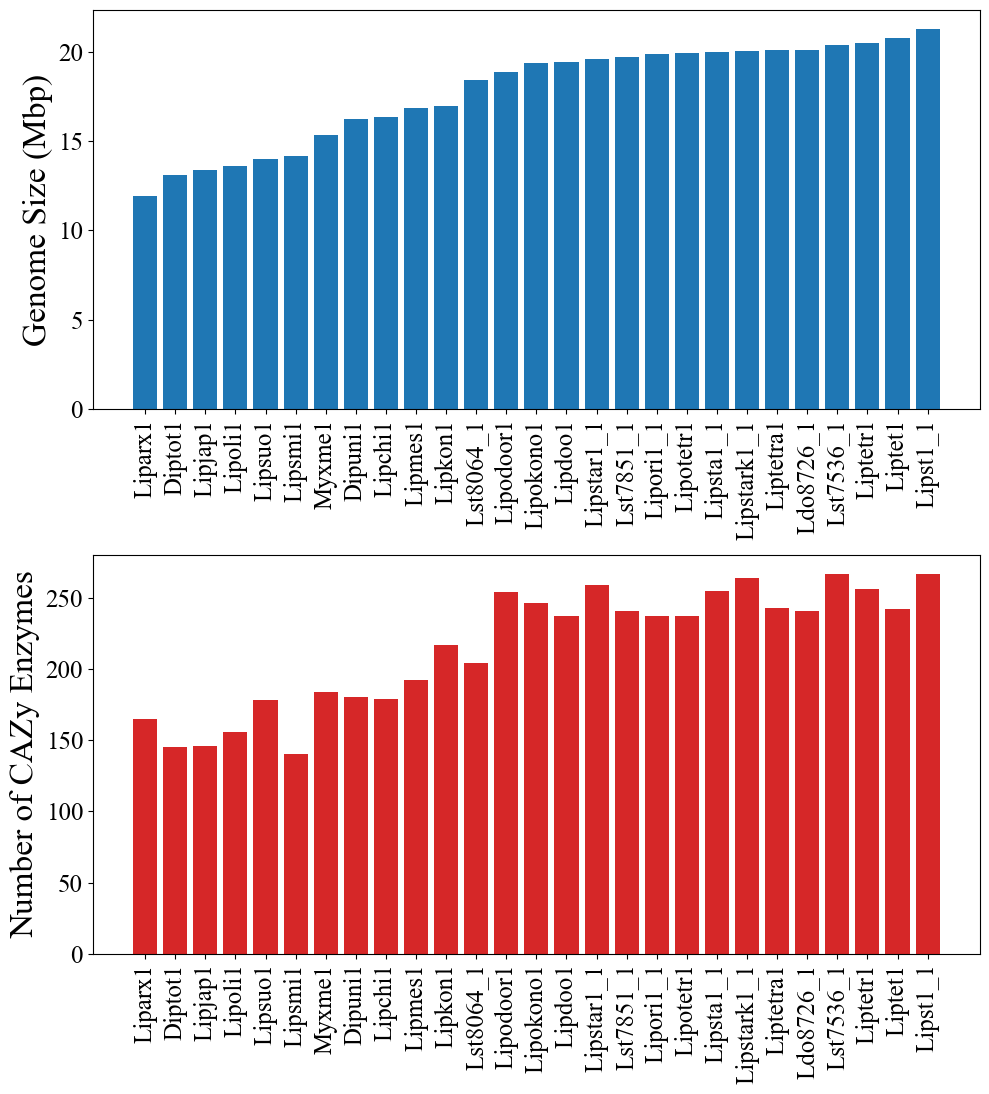

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Data
organisms = ["Liparx1", "Diptot1", "Lipjap1", "Lipoli1", "Lipsuo1", "Lipsmi1", "Myxme1", "Dipuni1", "Lipchi1",
             "Lipmes1", "Lipkon1", "Lst8064_1", "Lipodoor1", "Lipokono1", "Lipdoo1", "Lipstar1_1", "Lst7851_1",
             "Lipori1_1", "Lipotetr1", "Lipsta1_1", "Lipstark1_1", "Liptetra1", "Ldo8726_1", "Lst7536_1",
             "Liptetr1", "Liptet1", "Lipst1_1"]
genome_size = [11.92, 13.13, 13.37, 13.58, 14, 14.15, 15.33, 16.24, 16.37, 16.87, 16.95, 18.44, 18.88, 19.38, 19.4, 
               19.59, 19.72, 19.86, 19.92, 19.97, 20.06, 20.09, 20.12, 20.36, 20.46, 20.78, 21.27]
cazy = [165, 145, 146, 156, 178, 140, 184, 180, 179, 192, 217, 204, 254, 246, 237, 259, 241, 237, 237, 255, 264, 
        243, 241, 267, 256, 242, 267]

# ...

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot genome size on the primary y-axis
color = 'tab:blue'
ax1.set_ylabel('Genome Size (Mbp)', color='black', fontsize=24)
ax1.bar(organisms, genome_size, color=color)
ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelcolor='black', labelsize=18)

# Rotate x-axis labels and set ticks at the center of each bar
ax1.set_xticks(np.arange(len(organisms)))
ax1.set_xticklabels(organisms, rotation=90, ha='center')

# ...

# Plot CAZy on the secondary y-axis
ax2.set_ylabel('Number of CAZy Enzymes', color='black', fontsize=24)
ax2.bar(organisms, cazy, color='tab:red')
ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
ax2.tick_params(axis='x', labelcolor='black', labelsize=18)

# Rotate x-axis labels and set ticks at the center of each bar
ax2.set_xticks(np.arange(len(organisms)))
ax2.set_xticklabels(organisms, rotation=90, ha='center')

# ...

# Title and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('geneomsesize_cazy.png')
plt.show()


In [ ]:
Liptet1                97.446420
17622865-Ldo8726_1     98.814409
17655849-Ldo8726_1     98.814409
Lipori1_1              98.358413
Liparx1                93.661651
Lst7536_1              99.498404
Lipoli1                93.023256
Lipodoor1              98.404013
Lipst1_1              100.000000
Lipotetr1              97.537620
Diptot1                92.293662
Lst7851_1              99.179207
Lipkon1                97.264022
Lipsmi1                93.798450
Myxme1                 94.892841
Lst8064_1              98.495212
Lipjap1                92.658459
Liptetra1              97.400821
Lipsta1_1              99.407205
Lipdoo1                98.540812
Dipuni1                94.482444
Lipstark1_1            99.817601
Lipchi1                95.713634
Lipokono1              98.267214
Yarlip1                89.284086
Lipstar1_1             99.726402
Lipsuo1                94.938440
Liptetr1               97.720018
Babin1                 89.375285
Lipmes1                96.534428

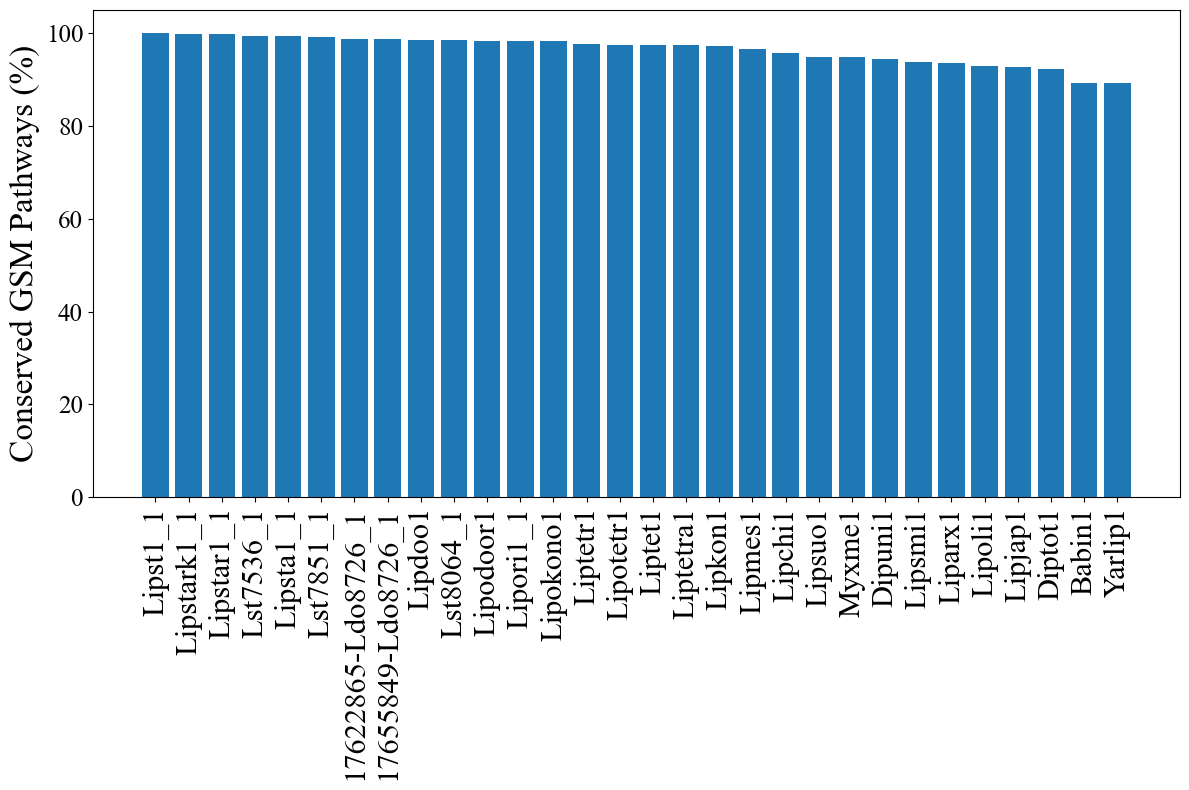

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

#  Data
data = [
    {"Organism": "Liptet1", "Percentage": 97.446420},
    {"Organism": "17622865-Ldo8726_1", "Percentage": 98.814409},
    {"Organism": "17655849-Ldo8726_1", "Percentage": 98.814409},
    {"Organism": "Lipori1_1", "Percentage": 98.358413},
    {"Organism": "Liparx1", "Percentage": 93.661651},
    {"Organism": "Lst7536_1", "Percentage": 99.498404},
    {"Organism": "Lipoli1", "Percentage": 93.023256},
    {"Organism": "Lipodoor1", "Percentage": 98.404013},
    {"Organism": "Lipst1_1", "Percentage": 100.000000},
    {"Organism": "Lipotetr1", "Percentage": 97.537620},
    {"Organism": "Diptot1", "Percentage": 92.293662},
    {"Organism": "Lst7851_1", "Percentage": 99.179207},
    {"Organism": "Lipkon1", "Percentage": 97.264022},
    {"Organism": "Lipsmi1", "Percentage": 93.798450},
    {"Organism": "Myxme1", "Percentage": 94.892841},
    {"Organism": "Lst8064_1", "Percentage": 98.495212},
    {"Organism": "Lipjap1", "Percentage": 92.658459},
    {"Organism": "Liptetra1", "Percentage": 97.400821},
    {"Organism": "Lipsta1_1", "Percentage": 99.407205},
    {"Organism": "Lipdoo1", "Percentage": 98.540812},
    {"Organism": "Dipuni1", "Percentage": 94.482444},
    {"Organism": "Lipstark1_1", "Percentage": 99.817601},
    {"Organism": "Lipchi1", "Percentage": 95.713634},
    {"Organism": "Lipokono1", "Percentage": 98.267214},
    {"Organism": "Yarlip1", "Percentage": 89.284086},
    {"Organism": "Lipstar1_1", "Percentage": 99.726402},
    {"Organism": "Lipsuo1", "Percentage": 94.938440},
    {"Organism": "Liptetr1", "Percentage": 97.720018},
    {"Organism": "Babin1", "Percentage": 89.375285},
    {"Organism": "Lipmes1", "Percentage": 96.534428},
]


# Create a DataFrame
df = pd.DataFrame(data)
plt.rcParams['font.family'] = 'Times New Roman'

# Sort the DataFrame by the "Percentage" column in descending order
df = df.sort_values(by="Percentage", ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(df["Organism"], df["Percentage"],color = 'tab:blue')

# plt.xlabel('Organism', fontsize=28)
plt.ylabel('Conserved GSM Pathways (%)', fontsize=24)
# plt.title('Percentage of Something', fontsize=16)
plt.xticks(rotation=90, ha='center')

plt.tick_params(axis='y', labelcolor='black', labelsize=18)
plt.tick_params(axis='x', labelcolor='black', labelsize=22)

plt.subplots_adjust(left=0.0, right=0.99, top=0.95, bottom=0.2)

# Show the plot
plt.tight_layout()
plt.savefig('conservations.png')
plt.show()


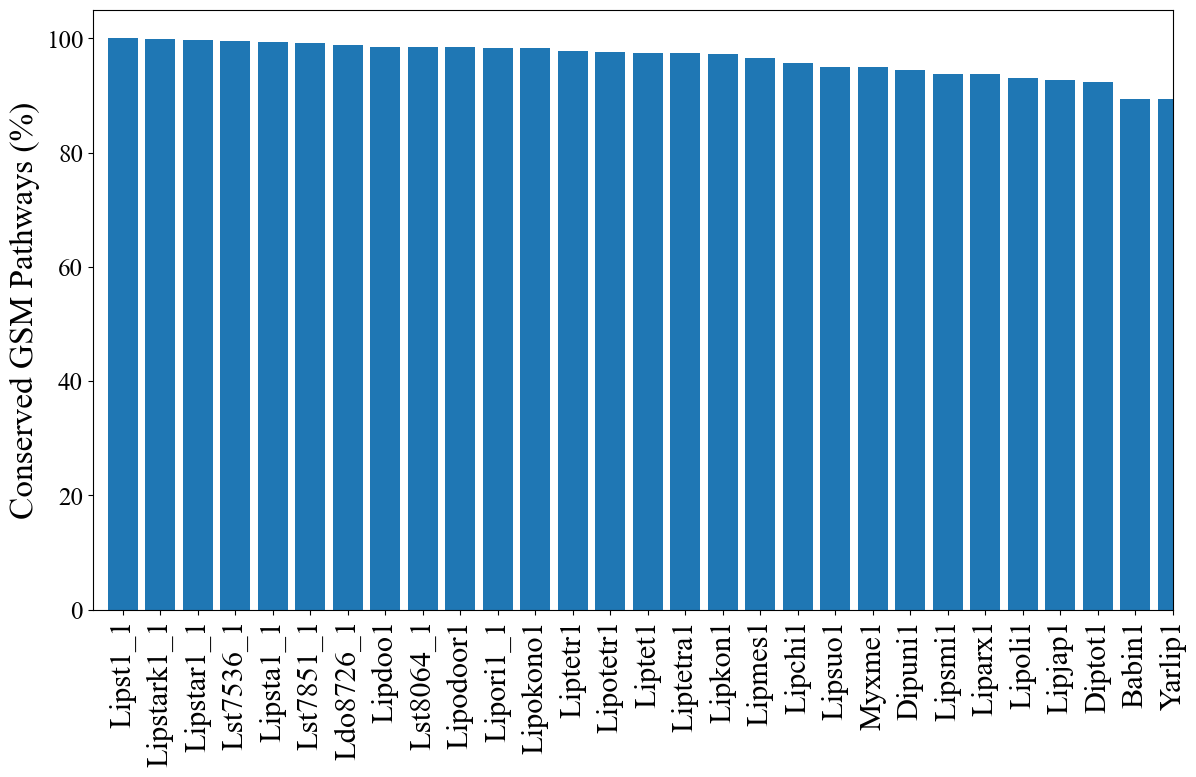

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = [
    {"Organism": "Liptet1", "Percentage": 97.446420},
    {"Organism": "Ldo8726_1", "Percentage": 98.814409},
    {"Organism": "Lipori1_1", "Percentage": 98.358413},
    {"Organism": "Liparx1", "Percentage": 93.661651},
    {"Organism": "Lst7536_1", "Percentage": 99.498404},
    {"Organism": "Lipoli1", "Percentage": 93.023256},
    {"Organism": "Lipodoor1", "Percentage": 98.404013},
    {"Organism": "Lipst1_1", "Percentage": 100.000000},
    {"Organism": "Lipotetr1", "Percentage": 97.537620},
    {"Organism": "Diptot1", "Percentage": 92.293662},
    {"Organism": "Lst7851_1", "Percentage": 99.179207},
    {"Organism": "Lipkon1", "Percentage": 97.264022},
    {"Organism": "Lipsmi1", "Percentage": 93.798450},
    {"Organism": "Myxme1", "Percentage": 94.892841},
    {"Organism": "Lst8064_1", "Percentage": 98.495212},
    {"Organism": "Lipjap1", "Percentage": 92.658459},
    {"Organism": "Liptetra1", "Percentage": 97.400821},
    {"Organism": "Lipsta1_1", "Percentage": 99.407205},
    {"Organism": "Lipdoo1", "Percentage": 98.540812},
    {"Organism": "Dipuni1", "Percentage": 94.482444},
    {"Organism": "Lipstark1_1", "Percentage": 99.817601},
    {"Organism": "Lipchi1", "Percentage": 95.713634},
    {"Organism": "Lipokono1", "Percentage": 98.267214},
    {"Organism": "Yarlip1", "Percentage": 89.284086},
    {"Organism": "Lipstar1_1", "Percentage": 99.726402},
    {"Organism": "Lipsuo1", "Percentage": 94.938440},
    {"Organism": "Liptetr1", "Percentage": 97.720018},
    {"Organism": "Babin1", "Percentage": 89.375285},
    {"Organism": "Lipmes1", "Percentage": 96.534428},
]

# Create a DataFrame
df = pd.DataFrame(data)
plt.rcParams['font.family'] = 'Times New Roman'

# Sort the DataFrame by the "Percentage" column in descending order
df = df.sort_values(by="Percentage", ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(df["Organism"], df["Percentage"], color='tab:blue', align='center')
plt.xlim(-0.8, len(df["Organism"]) - 1.0)








# plt.xlabel('Organism', fontsize=28)
plt.ylabel('Conserved GSM Pathways (%)', fontsize=24)
# plt.title('Percentage of Something', fontsize=16)
plt.xticks(rotation=90, ha='center')

plt.tick_params(axis='y', labelcolor='black', labelsize=18)
plt.tick_params(axis='x', labelcolor='black', labelsize=22)

# Adjust spacing
# plt.subplots_adjust(left=0.0, right=0.98, top=0.95, bottom=0.2)
plt.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.2)





# Show the plot
plt.savefig('conservations.png')
plt.show()
